# Exploration of Physical Therapy Dataset

## Data Card

### Subject Breakdown

| Subject | Gender | Age | Weight (kg) | Height (cm) |
| ------- | ------ | --- | ----------- | ----------- |
| 1       | F      | 55  | 73          | 169         |
| 2       | M      | 61  | 85          | 180         | 
| 3       | M      | 23  | 95          | 180         |
| 4       | F      | 48  | 55          | 158         |
| 5       | M      | 53  | 98          | 175         |
| Average | 60% M  | 48  | 81.2        | 172.4       |

### Exercise Summary

| Exercise | Description |
| -------- | ----------- |
| 1        | Sitting on a high flat surface, raise the right leg, hold for 5 s, keeping the right knee straight, and return to the initial position.| 
| 2        | Sitting upright on a stool with arms hanging downwards, bend the upper body 30◦ forward, hold for 5 s, and return to the initial position. |
| 3        | Lying flat on the back on a flat surface, raise the right leg from the hip joint, keeping the right knee and left leg straight, hold for 5 s, and return to the initial position. |
| 4        | Lying flat on the left side on a flat surface, raise the right leg from the hip joint, keeping the right knee and left leg straight, hold for 5 s, and return to the initial position. |
| 5        | Lying facedown on a flat surface, raise the right leg from the hip joint, keeping the right knee and the left leg straight, hold for 5 s, and return to the initial position. |
| 6        | Sitting on a chair, holding a 1 kg weight in the right hand, extend the right arm in front of the body to just above the right knee with the palm facing upwards. Bending the elbow joint, raise the weight until the forearm is perpendicular with the thigh, hold for 5 s, and return to the initial position. |
| 7        | Standing upright with the right arm holding a 1 kg weight and hanging straight down, raise the weight to the right side from the shoulder joint to a horizontal position while keeping the elbow joint straight, hold for 5 s, then return to the initial position. |
| 8        | Lying facedown on a raised flat surface, hang the right arm over the side at the elbow. Raise the right forearm to straighten the elbow, hold for 5 s, then return to the initial position. |

### Execution Types

| Execution Type | Description |
| -------------- | ----------- |
| 1              | Good execution |
| 2              | Too quick / Extreme movement |
| 3              | Too slow / Not Full Range Of Motion|

### Sensor Summary

Separate Sensor Configurations by Exercise

1. 2 Sensors per leg, 1 sensor on the chest for leg exercises.   
3. 3 Sensors on right arm, 1 sensor on chest, 1 sensor on leg for arm exercises

Sampling Rate - 25Hz    

## Imports

In [76]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

# Add parent folder to sys.path
sys.path.append(os.path.abspath(".."))
from functools import reduce

from helpers.load_data import load_data
from helpers.load_data import load_and_merge_sensors
from helpers.load_data import collect_template_times
import kagglehub

In [2]:
# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/physical-therapy-exercises-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/hammy/.cache/kagglehub/datasets/rabieelkharoua/physical-therapy-exercises-dataset/versions/1


In [3]:
df, times = load_data(path)

In [4]:
templates = df[df['file_name'] == 'template_session.txt']

In [5]:
filtered = []

for subject in templates['subject'].unique():
    for exercise in templates['exercise'].unique():
        df = load_and_merge_sensors(templates, subject, exercise)
        filtered.append(df)

filtered[0]

,acc_x_u1,acc_y_u1,acc_z_u1,gyr_x_u1,gyr_y_u1,gyr_z_u1,mag_x_u1,mag_y_u1,mag_z_u1,acc_x_u2,...,acc_y_u5,acc_z_u5,gyr_x_u5,gyr_y_u5,gyr_z_u5,mag_x_u5,mag_y_u5,mag_z_u5,subject,exercise
time index,,,,,,,,,,,,,,,,,,,,,
1,-9.665799,-1.677241,0.615063,-0.014956,0.004388,0.010589,0.587318,0.455106,-0.094949,-9.567934,...,-7.650306,-4.317889,0.004610,-0.005113,0.008308,0.015362,0.734462,0.204774,s1,e1
2,-9.665806,-1.684737,0.622513,0.000607,-0.003094,-0.007589,0.587428,0.455621,-0.093364,-9.590250,...,-7.647765,-4.325564,0.000332,-0.001732,-0.000527,0.014407,0.735530,0.205962,s1,e1
3,-9.628410,-1.699724,0.585751,0.006007,0.000557,-0.004879,0.588389,0.454722,-0.094907,-9.590147,...,-7.667366,-4.317407,0.011205,0.012671,-0.009310,0.014569,0.736845,0.204158,s1,e1
4,-9.628372,-1.684836,0.600733,-0.003085,-0.000281,-0.000340,0.588673,0.455759,-0.092664,-9.560378,...,-7.640699,-4.288569,-0.005662,-0.002119,-0.012891,0.014377,0.737884,0.205386,s1,e1
5,-9.643291,-1.639893,0.585661,-0.002932,-0.006807,-0.013043,0.589193,0.453927,-0.093143,-9.545363,...,-7.640638,-4.300906,-0.003275,0.007345,0.000377,0.013961,0.735951,0.204659,s1,e1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,-9.682711,-1.706522,0.350804,-0.005728,-0.003561,-0.001633,0.588366,0.459061,-0.064641,-9.585998,...,-7.651338,-4.540401,-0.004194,-0.023233,-0.003118,-0.009224,0.726370,0.229706,s1,e1
2184,-9.667724,-1.691574,0.328685,-0.012997,0.010897,0.005710,0.587457,0.460252,-0.065893,-9.623240,...,-7.641556,-4.550500,0.015608,-0.002392,-0.012769,-0.009044,0.726354,0.230735,s1,e1
2185,-9.667731,-1.684025,0.306292,-0.020050,-0.000178,-0.008818,0.587153,0.456937,-0.065174,-9.608284,...,-7.631843,-4.550669,-0.004200,0.005834,-0.004825,-0.008445,0.726600,0.229995,s1,e1


In [6]:
merged = pd.concat(filtered)


## Missing Values

In [7]:
merged.shape

(55325, 47)

No missing values based on the merged dataset

In [8]:
merged.isna().sum()

acc_x_u1    0
acc_y_u1    0
acc_z_u1    0
gyr_x_u1    0
gyr_y_u1    0
gyr_z_u1    0
mag_x_u1    0
mag_y_u1    0
mag_z_u1    0
acc_x_u2    0
acc_y_u2    0
acc_z_u2    0
gyr_x_u2    0
gyr_y_u2    0
gyr_z_u2    0
mag_x_u2    0
mag_y_u2    0
mag_z_u2    0
acc_x_u3    0
acc_y_u3    0
acc_z_u3    0
gyr_x_u3    0
gyr_y_u3    0
gyr_z_u3    0
mag_x_u3    0
mag_y_u3    0
mag_z_u3    0
acc_x_u4    0
acc_y_u4    0
acc_z_u4    0
gyr_x_u4    0
gyr_y_u4    0
gyr_z_u4    0
mag_x_u4    0
mag_y_u4    0
mag_z_u4    0
acc_x_u5    0
acc_y_u5    0
acc_z_u5    0
gyr_x_u5    0
gyr_y_u5    0
gyr_z_u5    0
mag_x_u5    0
mag_y_u5    0
mag_z_u5    0
subject     0
exercise    0
dtype: int64

## Helper Functions

In [87]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

def plot_labeled_sensor(df_labeled, sensors, title=None, figsize=(15,5), shade_alpha=0.2):
    """
    Plot multiple sensor signals on a single plot with shaded execution intervals.
    
    Args:
        df_labeled (pd.DataFrame): Sensor data with 'execution type' column and time as index.
        sensors (list of str): List of sensor column names to plot.
        title (str, optional): Plot title.
        figsize (tuple, optional): Figure size.
        shade_alpha (float, optional): Transparency of execution shading.
    """
    n_sensors = len(sensors)
    colors = matplotlib.colormaps.get_cmap('tab10').resampled(n_sensors)
  # distinct colors for sensors
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot each sensor
    for i, sensor in enumerate(sensors):
        ax.plot(df_labeled.index, df_labeled[sensor], color=colors(i), label=sensor)
    
    # Shade execution intervals
    exec_types = df_labeled['execution type'].dropna().unique()
    cmap = matplotlib.colormaps.get_cmap('Set3').resampled(len(exec_types))
    
    for j, exec_type in enumerate(exec_types):
        mask = df_labeled['execution type'] == exec_type
        ax.fill_between(df_labeled.index, 
                        df_labeled[sensors].min().min()-0.1, 
                        df_labeled[sensors].max().max()+0.1, 
                        where=mask, 
                        color=cmap(j), 
                        alpha=shade_alpha,
                        label=f'Execution {exec_type}')
    
    ax.set_xlabel('Time index')
    ax.set_ylabel('Sensor values')
    if title:
        ax.set_title(title, fontsize=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()


In [88]:
import pandas as pd

def label_subject_exercise(merged_df, times_df, subject_id, exercise_name):
    """
    Filter sensor data by subject and exercise, then label each row with execution type.
    Handles merge_asof dtype issues. Drops start/end columns after labeling.
    """
    # Filter by subject and exercise
    df = merged_df[(merged_df['subject'] == subject_id) & 
                   (merged_df['exercise'] == exercise_name)].copy()
    
    # Reset index for merge_asof
    df_reset = df.reset_index().rename(columns={'time index': 'time'})
    
    # Convert time to float to match times_df
    df_reset['time'] = df_reset['time'].astype(float)
    times_df = times_df.copy()
    times_df['start'] = times_df['start'].astype(float)
    times_df['end'] = times_df['end'].astype(float)
    
    # Sort by time
    df_reset = df_reset.sort_values('time')
    times_sorted = times_df.sort_values('start')
    
    # Merge_asof to assign execution type based on nearest start
    df_labeled = pd.merge_asof(
        df_reset,
        times_sorted,
        left_on='time',
        right_on='start',
        direction='backward'
    )
    
    # Set execution_type to NA if time > end
    df_labeled.loc[df_labeled['time'] > df_labeled['end'], 'execution type'] = pd.NA
    
    # Drop start and end columns
    df_labeled = df_labeled.drop(columns=['start', 'end'])
    
    # Restore index
    df_labeled = df_labeled.set_index('time')
    
    return df_labeled


## Signal Analysis

### Subject + Exercise

In [89]:
sub = 's4'
ex = 'e7'

sample_time = collect_template_times(times, sub, ex)
sample_data = label_subject_exercise(merged, sample_time, sub, ex)

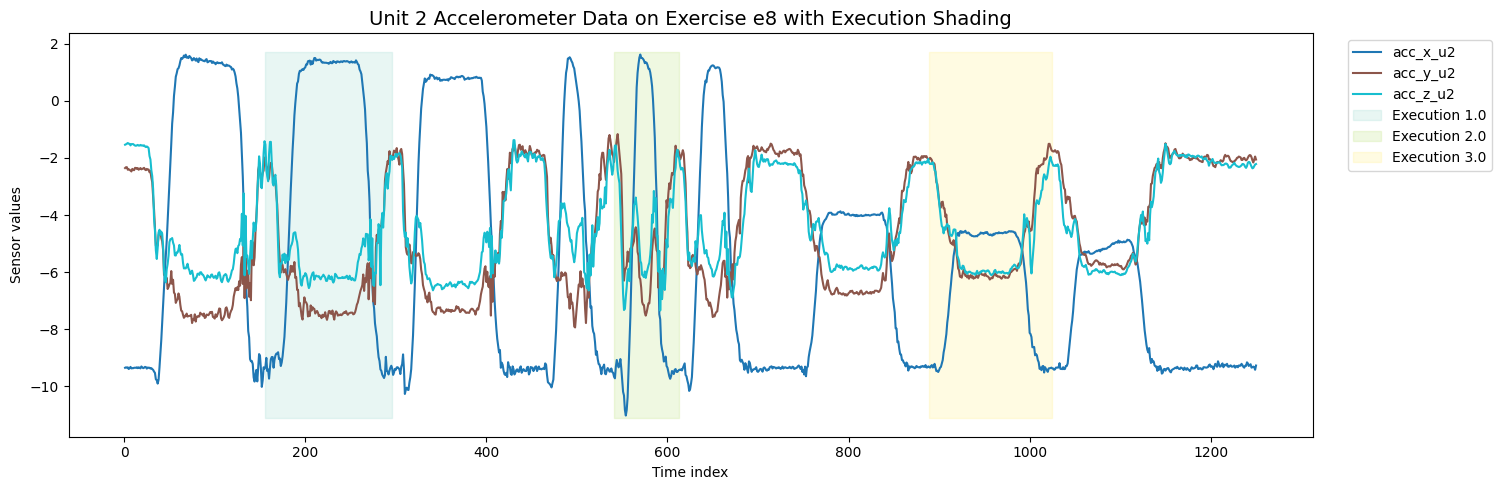

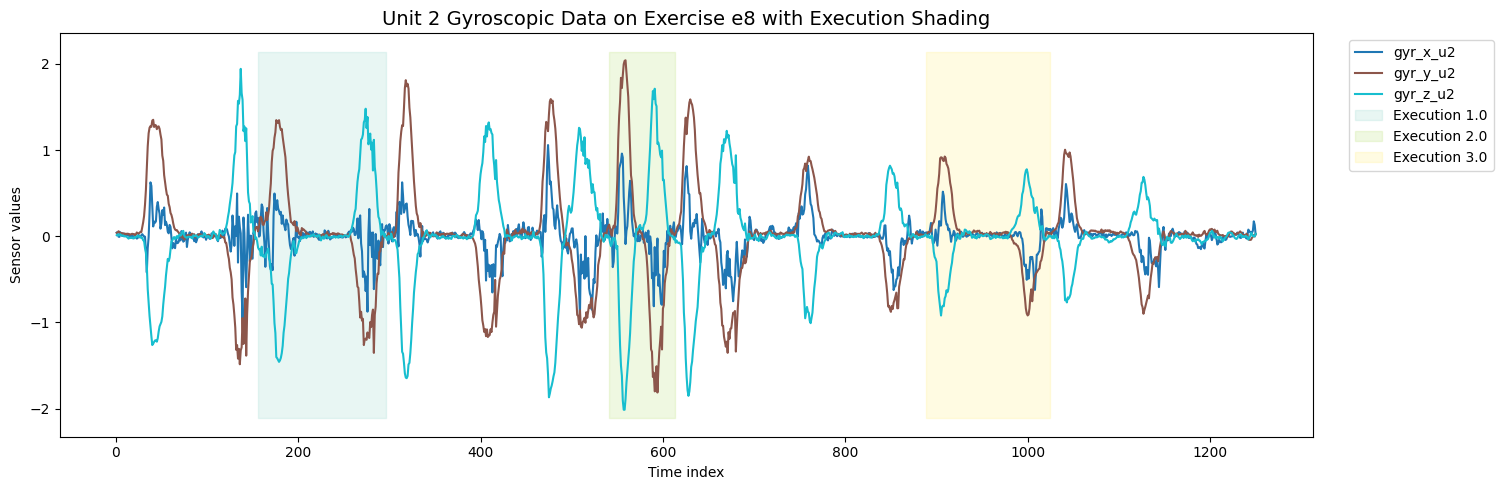

In [90]:
unit = 2

acc_sensors = [f'acc_x_u{unit}', f'acc_y_u{unit}', f'acc_z_u{unit}']
gyr_sensors = [f'gyr_x_u{unit}', f'gyr_y_u{unit}', f'gyr_z_u{unit}']
mag_sensors = [f'mag_x_u{unit}', f'mag_y_u{unit}', f'mag_z_u{unit}']

# Single sensor
plot_labeled_sensor(sample_data, acc_sensors, title=f'Unit {unit} Accelerometer Data on Exercise {exercise} with Execution Shading')

# Multiple sensors
plot_labeled_sensor(sample_data, gyr_sensors, 
                    title=f'Unit {unit} Gyroscopic Data on Exercise {exercise} with Execution Shading')